# McNemar's Test for Proportions
> Use Case
- McNemar's Test is used to analyze paired categorical data where the same subjects are measured twice under different conditions or treatments (paired samples).
- Useful when dealing with paired or repeated measures data, such as before-and-after treatment comparisons or matched case-control studies.
> Assumptions
- The data is paired, meaning each subject contributes to both categories being compared.
- The data is categorical with two levels or categories.
- The observations are dependent within each pair.
> Example Scenario
- Suppose we want to assess whether a new teaching method improves students' performance compared to a traditional method. Each student's performance is assessed twice: once with the traditional method and once with the new method.
> Null Hypothesis (H0):
- The null hypothesis states that there is no difference in proportions between the two conditions or treatments.
> Alternative Hypothesis (H1):
- The alternative hypothesis states that there is a difference in proportions between the two conditions or treatments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install scipy==1.12.0
from scipy.stats import norm

# !pip install statsmodels==0.12.2
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.proportion import proportion_effectsize

# !pip install pingouin==0.5.4
from pingouin import chi2_mcnemar


/Users/sam/opt/anaconda3/envs/ab_env/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/sam/opt/anaconda3/envs/ab_env/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/var/folders/r4/fdchq33x2vg7z1_7dstrhrn80000gn/T/ipykernel_66267/1297694737.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/544

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# set seaborn style
sns.set(style="white", palette="mako")

# colors
color = 'cadetblue'

# remove some borders    
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False 

### Power Analysis

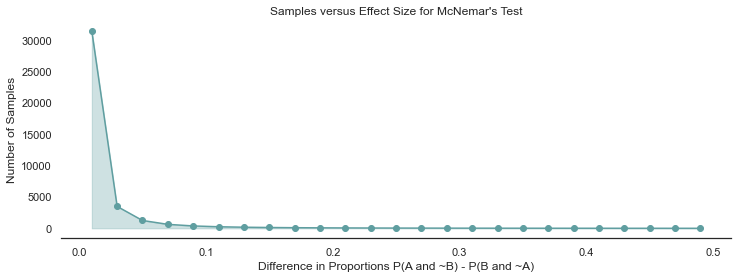

In [4]:
confidence_level = 0.95
power = 0.8

# Group A failure & Group B success proportion
p01 = np.linspace(0.01, 0.5 ,50) 
# Group B failure & Group A success proportion
p10 = np.linspace(0.01, 0.5, 50)
p10 = p10[::-1]

# Difference in proportions
pdiff = p10 - p01
# pdiff = pdiff[pdiff > 0] 

# Sum of proportions
pdisc = p10 + p01

# *2 to convert cited example's 1-sided test to 2-sided test
alpha = (1-confidence_level) * 2  
beta = (1-power)

# Calculate samples
samples = ((norm.ppf(1 - alpha/2) * np.sqrt(pdisc) + norm.ppf(1 - beta) * np.sqrt(pdisc - pdiff**2)) / pdiff)**2
samples = np.ceil(samples) 
x1 = (pdiff * np.sqrt(samples) - norm.ppf(1 - alpha/2) * np.sqrt(pdisc)) / np.sqrt(pdisc - pdiff**2)
x2 = (-pdiff * np.sqrt(samples) - norm.ppf(1 - alpha/2) * np.sqrt(pdisc)) / np.sqrt(pdisc - pdiff**2)
power = norm.cdf(x1) + norm.cdf(x2)

# We only need the positive difference, as the negative difference is the same
pdiff = pdiff[pdiff>0]
samples = samples[:len(pdiff[pdiff>0])]

# Figure size
plt.figure(figsize=(12, 4))
# Plot samples versus effect size
plt.plot(pdiff, samples, color=color, marker='o')
# Shade area below the line with lower opacity
plt.fill_between(pdiff, samples, color=color, alpha=0.3)
# Add plot labels and title
plt.xlabel('Difference in Proportions P(A and ~B) - P(B and ~A)')
plt.ylabel('Number of Samples')
plt.title("Samples versus Effect Size for McNemar's Test")
plt.show()


In [5]:
confidence_level = 0.95
power = 0.8

# Group A failure & Group B success proportion
p01 = 0.15
# Group B failure & Group A success proportion
p10 = 0.25

pdisc = p10 + p01
pdiff = p10 - p01

alpha = (1-confidence_level) * 2  # *2 to convert cited example's 1-sided test to 2-sided test
beta = (1-power)


samples = ((norm.ppf(1 - alpha/2) * np.sqrt(pdisc) + norm.ppf(1 - beta) * np.sqrt(pdisc - pdiff**2)) / pdiff)**2
# Round up to nearest integer
samples = int(np.ceil(samples))

x1 = (pdiff * np.sqrt(samples) - norm.ppf(1 - alpha/2) * np.sqrt(pdisc)) / np.sqrt(pdisc - pdiff**2)
x2 = (-pdiff * np.sqrt(samples) - norm.ppf(1 - alpha/2) * np.sqrt(pdisc)) / np.sqrt(pdisc - pdiff**2)
power = norm.cdf(x1) + norm.cdf(x2)

print(f"Difference in proportions: {round(pdiff, 4)}")
print(f"Required sample size: {samples} pairs of samples")

Difference in proportions: 0.1
Required sample size: 246 pairs of samples


### Synthetic Data

In [6]:

# Generate synthetic data for student performance
traditional_method_scores = np.random.normal(loc=65, scale=10, size=samples)
new_method_scores = np.random.normal(loc=75, scale=20, size=samples)

# Create a pandas DataFrame
mcnemars_data = pd.DataFrame({
    'Student_ID': range(1, samples + 1),
    'Traditional_Method_Score': traditional_method_scores,
    'New_Method_Score': new_method_scores
})

mcnemars_data


,Student_ID,Traditional_Method_Score,New_Method_Score
0,1,69.967142,65.501094
1,2,63.617357,61.933415
2,3,71.476885,110.309085
3,4,80.230299,83.099634
4,5,62.658466,49.782321
...,...,...,...
241,242,63.852636,53.369040
242,243,70.049873,108.742833
243,244,73.657552,92.632795
244,245,52.997036,74.840547


In [7]:
passing_score = 60

mcnemars_data['Traditional_Method_Score'] = np.where(mcnemars_data['Traditional_Method_Score'] >= passing_score, 1, 0)
mcnemars_data['New_Method_Score'] = np.where(mcnemars_data['New_Method_Score'] >= passing_score, 1, 0)

print(mcnemars_data['Traditional_Method_Score'].value_counts())
print("\n")
print(mcnemars_data['New_Method_Score'].value_counts())

mcnemars_data

Traditional_Method_Score
1    170
0     76
Name: count, dtype: int64


New_Method_Score
1    190
0     56
Name: count, dtype: int64


,Student_ID,Traditional_Method_Score,New_Method_Score
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,0
...,...,...,...
241,242,1,0
242,243,1,1
243,244,1,1
244,245,0,1


In [8]:
# Contingency table
observed_counts = pd.crosstab(mcnemars_data['New_Method_Score'], mcnemars_data['Traditional_Method_Score'])
observed_counts

Traditional_Method_Score,0,1
New_Method_Score,,
0,17,39
1,59,131


In [9]:
# Contingency table normalized
observed_counts = pd.crosstab(mcnemars_data['New_Method_Score'], mcnemars_data['Traditional_Method_Score'], normalize=True)
observed_counts

Traditional_Method_Score,0,1
New_Method_Score,,
0,0.069106,0.158537
1,0.239837,0.532520


### Check Assumptions

In [10]:
# Assumption check for z-test for proportions
successes_group_A = mcnemars_data['New_Method_Score'].sum()
failures_group_A = mcnemars_data['New_Method_Score'].count() - successes_group_A
successes_group_B = mcnemars_data['Traditional_Method_Score'].sum()
failures_group_B = mcnemars_data['Traditional_Method_Score'].count() - successes_group_B

min_sample_size = 5

# Check if successes and failures are sufficiently large
mcnemar_test_assumption_met = all(n > min_sample_size for n in [successes_group_A, failures_group_A, successes_group_B, failures_group_B])

# Check if the data is binary
binary_A_check = (mcnemars_data['New_Method_Score'].isin([0, 1, np.nan, pd.NA]).all())
binary_B_check = (mcnemars_data['Traditional_Method_Score'].isin([0, 1, np.nan, pd.NA]).all())

print(f"McNemar's Test for Proportions Assumption: Successes and failures are sufficiently large - {'Met' if mcnemar_test_assumption_met else 'Not Met'}")
print(f"McNemar's Test for Proportions Assumption: Data is numeric and binary - {'Met' if binary_A_check and binary_B_check else 'Not Met'}")


McNemar's Test for Proportions Assumption: Successes and failures are sufficiently large - Met
McNemar's Test for Proportions Assumption: Data is numeric and binary - Met


### McNemar's Test (statsmodels)

In [11]:
# Pre-determined alpha
alpha = 0.05  

In [12]:
# Contingency table
observed_counts = pd.crosstab(mcnemars_data['New_Method_Score'], mcnemars_data['Traditional_Method_Score'])
observed_counts

Traditional_Method_Score,0,1
New_Method_Score,,
0,17,39
1,59,131


In [13]:

# exact: If exact is true, then the binomial distribution will be used. If exact is false, then the Chi-Square distribution will be used
if successes_group_A + successes_group_B < 25:
    print("Performing the Exact Binomial McNemar's Test")
    exact = True
else:
    print("Performing the Approximate Chi-Squared McNemar's Test")
    exact = False

# correction: If true, a continuity correction is used. As a rule of thumb, this correction is typically applied when any of the cell counts in the table are less than 5.
if (successes_group_A  <  5 ) | (successes_group_B  <  5 ) | (failures_group_A  <  5 ) | (failures_group_B  <  5 ):
    print("With Edwards' Continuity Correction")
    correction = True
else:
    print("Without Edwards' Continuity Correction")
    correction = False

# Performing McNemar's Test
result = mcnemar(table = observed_counts, exact=exact, correction=correction)
p_value = result.pvalue

# Print the test statistic and p-value
print("McNemar's test statistic:", result.statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value < alpha:
    conclusion = "Reject the null hypothesis."
    interpretation = "There is a significant difference in the proportions between Group A and Group B."
else:
    conclusion = "Fail to reject the null hypothesis."
    interpretation = "There is no significant difference in proportions between Group A and Group B."
print("\n")
print(conclusion)
print(interpretation)

Performing the Approximate Chi-Squared McNemar's Test
Without Edwards' Continuity Correction
McNemar's test statistic: 4.081632653061225
p-value: 0.04335175126086287


Reject the null hypothesis.
There is a significant difference in the proportions between Group A and Group B.


### McNemar's (pingouin)

In [14]:
# correction: If true, a continuity correction is used. As a rule of thumb, this correction is typically applied when any of the cell counts in the table are less than 5.
if (successes_group_A  <  5 ) | (successes_group_B  <  5 ) | (failures_group_A  <  5 ) | (failures_group_B  <  5 ):
    print("Performing the Approximate Chi-Squared McNemar's Test with Edwards' Continuity Correction")
    correction = True
else:
    print("Performing the Approximate Chi-Squared McNemar's Test without Edwards' Continuity Correction")
    correction = False


# Perform McNemar's test
observed, stats = chi2_mcnemar(mcnemars_data, 'Traditional_Method_Score', 'New_Method_Score', correction=correction)

# Print the result
chi2 = stats['chi2'].mcnemar
dof = stats['dof'].mcnemar
p_value_approx = stats['p-approx'].mcnemar
p_value_exact= stats['p-exact'].mcnemar

# Print the test statistic and p-value
print(f"McNemar's test statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"Approximate p-value: {p_value_approx}")
print(f"Exact p-value: {p_value_exact}")


# Check for statistical significance
if p_value_approx < alpha:
    conclusion = "Reject the null hypothesis."
    interpretation = "There is a significant difference in the proportions between Group A and Group B."
else:
    conclusion = "Fail to reject the null hypothesis."
    interpretation = "There is no significant difference in proportions between Group A and Group B."
print("\n")
print(conclusion)
print(interpretation)

Performing the Approximate Chi-Squared McNemar's Test without Edwards' Continuity Correction
McNemar's test statistic: 4.081632653061225
Degrees of Freedom: 1
Approximate p-value: 0.04335175126086287
Exact p-value: 0.05439055827708824


Reject the null hypothesis.
There is a significant difference in the proportions between Group A and Group B.


### 95% Confidence Interval

In [15]:
# Contingency table normalized
observed_counts = pd.crosstab(mcnemars_data['New_Method_Score'], mcnemars_data['Traditional_Method_Score'], normalize=True)
observed_counts

Traditional_Method_Score,0,1
New_Method_Score,,
0,0.069106,0.158537
1,0.239837,0.532520


In [16]:
confidence_level = 0.95

# Discordants
p01 = observed_counts[0][1]
p10 = observed_counts[1][0]

# Difference in discordants
pdiff = p01 - p10

# Calculate standard error of the difference
se_diff = np.sqrt(p01 * (1 - p01) / samples + p10 * (1 - p10) / samples)

# Critical value for 95% confidence interval
critical_value = norm.ppf(1 - ((1-confidence_level)/2))   # For a two-tailed test

# Margin of error
margin_of_error = critical_value * se_diff

# Calculate confidence interval
lower_bound = pdiff - margin_of_error
upper_bound = pdiff + margin_of_error

# Print results
print(f"Difference in Proportions (discordants): {pdiff}")
print(f"95% Confidence Interval of the Difference in Proportions (discordants): [{lower_bound}, {upper_bound}]")


Difference in Proportions (discordants): 0.08130081300813008
95% Confidence Interval of the Difference in Proportions (discordants): [0.011085745607500377, 0.1515158804087598]


### Effect Size

In [17]:

# Cohen's h effect size
h = abs(proportion_effectsize(p01, p10, method='normal'))

print(f"Cohen's h Effect Size: {h}")
print("\n")

if h >= 0.8:
    print("There is a large difference between the two groups.")
elif h >= 0.5:
    print("There is a moderate difference between the two groups.")
elif h >= 0.2:
    print("There is a small difference between the two groups.")
else:
    print("There is no difference between the two groups.")


Cohen's h Effect Size: 0.20453013171531564


There is a small difference between the two groups.


### Odds Ratio

In [18]:

# Odds Ratio
odd_ratio = (successes_group_A * failures_group_B) / (successes_group_B * failures_group_A)

print(f"The odds ratio is {round(odd_ratio, 4)}")
print(f"The odds of the outcome are {round(odd_ratio, 4)} times as high in the exposed group compared to the unexposed group.")
print("\n")

if odd_ratio > 1:
    print("This suggests a positive association between the exposure and the outcome.\nIt means that the odds of the outcome occurring in the exposed group are higher than the odds of the outcome occurring in the unexposed group. ")
elif odd_ratio < 1:
    print("This implies a negative association between the exposure and the outcome.\nIt indicates that the odds of the outcome occurring in the exposed group are lower than the odds of the outcome occurring in the unexposed group.")
else:
    print("This indicates no association between the exposure and the outcome.\nIn other words, the odds of the outcome occurring in the exposed group are the same as the odds of the outcome occurring in the unexposed group.")

The odds ratio is 1.5168
The odds of the outcome are 1.5168 times as high in the exposed group compared to the unexposed group.


This suggests a positive association between the exposure and the outcome.
It means that the odds of the outcome occurring in the exposed group are higher than the odds of the outcome occurring in the unexposed group. 


### Summary Table

In [19]:
# Count everything up
total_count = mcnemars_data.size
group_a_count = mcnemars_data['Traditional_Method_Score'].count()
group_b_count = mcnemars_data['New_Method_Score'].count()
group_a_positive_count = mcnemars_data['Traditional_Method_Score'].value_counts()[1]
group_a_negative_count = mcnemars_data['Traditional_Method_Score'].value_counts()[0]
group_b_positive_count = mcnemars_data['New_Method_Score'].value_counts()[1]
group_b_negative_count = mcnemars_data['New_Method_Score'].value_counts()[0]

In [20]:
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Intervention Group': ["Traditional Method", "New Method"],
    'Total': [group_a_count, group_b_count],
    'Pass': [group_a_positive_count, group_b_positive_count],
    'Fail': [group_a_negative_count, group_b_negative_count],
    'Pass Rate': [group_a_positive_count/group_a_count, group_b_positive_count/group_b_count],
}, index=[0, 1])
plot_data

,Intervention Group,Total,Pass,Fail,Pass Rate
0,Traditional Method,246,170,76,0.691057
1,New Method,246,190,56,0.772358


### Visualization

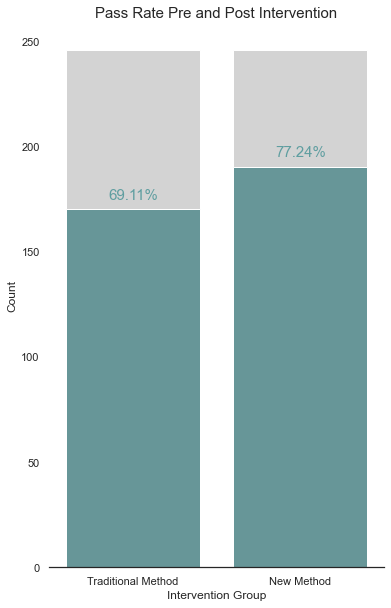

In [22]:
# Plot stacked bars
plt.figure(figsize=(6, 10))

plot_total = sns.barplot(x=plot_data['Intervention Group'], 
                        y=plot_data['Total'], color='lightgrey')

plot_satisfied = sns.barplot(x=plot_data['Intervention Group'], 
                            y=plot_data['Pass'], color=color)

# Set labels and title
plt.title('Pass Rate Pre and Post Intervention', fontsize=15)
plt.ylabel('Count')
plt.tick_params(left=False,bottom=False,labelleft=True,labelbottom=True)

# Put values on top of bars
row_list = []
for index, row in plot_data[plot_data['Intervention Group'] == 'Traditional Method'][['Pass', 'Pass Rate']].iterrows():
    plot_total.text(row.name, row['Pass']+5, str(round(100 * row['Pass Rate'], 2)) + '%', color=color, ha="center", fontsize=15)
for index, row in plot_data[plot_data['Intervention Group'] == 'New Method'][['Pass', 'Pass Rate']].iterrows():
    plot_satisfied.text(row.name, row['Pass']+5, str(round(100 * row['Pass Rate'], 2)) + '%', color=color, ha="center", fontsize=15)


# Show the plot
plt.show()